In [64]:
#import libraries
import numpy as np
import pandas as pd


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [67]:
import tensorflow as tf

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [70]:
df=pd.read_csv('data.csv') #upload dataset

In [71]:
df.head() #check for data

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [72]:
df.isnull().sum() #check for null values

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64

In [73]:
df.shape

(50553, 12)

In [74]:
(df.isnull().sum()/df.shape[0])*100

ID                       0.000000
Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.119419
Age                      0.000000
dtype: float64

In [75]:
df.drop('Gender',inplace=True,axis=1) #replacing null values

In [76]:
df.isnull().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Claim                   0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    50553 non-null  int64  
 1   Agency                50553 non-null  object 
 2   Agency Type           50553 non-null  object 
 3   Distribution Channel  50553 non-null  object 
 4   Product Name          50553 non-null  object 
 5   Claim                 50553 non-null  int64  
 6   Duration              50553 non-null  int64  
 7   Destination           50553 non-null  object 
 8   Net Sales             50553 non-null  float64
 9   Commision (in value)  50553 non-null  float64
 10  Age                   50553 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.2+ MB


In [78]:
df['Claim'].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

In [79]:
df_cat=df.select_dtypes(object)

In [80]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
1,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,MALAYSIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,INDONESIA
4,EPX,Travel Agency,Online,Cancellation Plan,"KOREA, REPUBLIC OF"


In [81]:
df_num=df.select_dtypes(['float64','int64'])

In [82]:
df_num.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
0,3433,0,7,0.0,17.82,31
1,4339,0,85,69.0,0.00,36
2,34590,0,11,19.8,11.88,75
3,55816,0,16,20.0,0.00,32
4,13816,0,10,15.0,0.00,29


In [83]:
for col in  df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [84]:
df_cat.head()

,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,6,1,1,16,56
1,7,1,1,10,79
2,6,1,1,16,56
3,7,1,1,1,38
4,7,1,1,10,47


In [85]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [86]:
df_new.head()

,ID,Claim,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,0,7,0.0,17.82,31,6,1,1,16,56
1,4339,0,85,69.0,0.00,36,7,1,1,10,79
2,34590,0,11,19.8,11.88,75,6,1,1,16,56
3,55816,0,16,20.0,0.00,32,7,1,1,1,38
4,13816,0,10,15.0,0.00,29,7,1,1,10,47


In [87]:
X=df_new.drop('Claim',axis=1)
Y=df_new[['Claim']]

In [88]:
X.head()

,ID,Duration,Net Sales,Commision (in value),Age,Agency,Agency Type,Distribution Channel,Product Name,Destination
0,3433,7,0.0,17.82,31,6,1,1,16,56
1,4339,85,69.0,0.00,36,7,1,1,10,79
2,34590,11,19.8,11.88,75,6,1,1,16,56
3,55816,16,20.0,0.00,32,7,1,1,1,38
4,13816,10,15.0,0.00,29,7,1,1,10,47


In [89]:
Y.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [90]:
#call class for training and testing
from sklearn.model_selection import train_test_split

In [91]:
#dividing data into set of train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [92]:
ss=StandardScaler()

In [93]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [94]:
X.shape

(50553, 10)

In [95]:
#creating neural networks
model=tf.keras.Sequential([
    
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 22        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [97]:
model.compile(optimizer='sgd',loss="binary_crossentropy")

In [98]:
train_model=model.fit(X_train_ss,Y_train,epochs=20)

Epoch 1/20
1106/1106 [==============================] - 1s 1ms/step - loss: 0.1813
Epoch 2/20
1106/1106 [==============================] - 1s 958us/step - loss: 0.0833
Epoch 3/20
1106/1106 [==============================] - 1s 1ms/step - loss: 0.0795
Epoch 4/20
1106/1106 [==============================] - 1s 962us/step - loss: 0.0780
Epoch 5/20
1106/1106 [==============================] - 1s 984us/step - loss: 0.0770
Epoch 6/20
1106/1106 [==============================] - 1s 980us/step - loss: 0.0762
Epoch 7/20
1106/1106 [==============================] - 1s 997us/step - loss: 0.0756
Epoch 8/20
1106/1106 [==============================] - 1s 969us/step - loss: 0.0750
Epoch 9/20
1106/1106 [==============================] - 1s 993us/step - loss: 0.0745
Epoch 10/20
1106/1106 [==============================] - 1s 984us/step - loss: 0.0741
Epoch 11/20
1106/1106 [==============================] - 1s 993us/step - loss: 0.0737
Epoch 12/20
1106/1106 [==============================] - 1s 968us/s

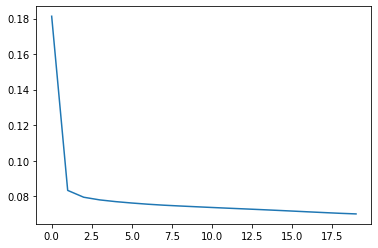

In [99]:
plt.plot(train_model.history['loss'])

In [100]:
Y_pred=model.predict(X_test_ss)

In [101]:
Y_pred

array([[0.01743206],
       [0.00246108],
       [0.00996515],
       ...,
       [0.04373446],
       [0.00445324],
       [0.00429642]], dtype=float32)

In [102]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [103]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14961
           1       0.00      0.00      0.00       205

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166

